# THE SPARK FOUNDATION
## DATA SCIENCE & BUISNESS ANALYTICS INTERNSHIP -DEC'21

# Author : SALIM KARKARIA
## Task 1: Prediction Using Supervised Machine Learning
### Problem Statement: Predict the percentage of a student based on the no. of study hours.
In this regression task I tried to predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

This is a simple linear regression task as it involves just two variables

In [309]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


Reading the Data from source

In [288]:
url="http://bit.ly/w-data"
df=pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [290]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [291]:
df.shape

(25, 2)

As we can see that there are 25 rows and 2 columns in the dataset.

In [292]:
#checking for null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

There is no null values in the dataset.

DATA VISUALIZATION

Let's plot our data points on 2-D graph to visualize our dataset and see if we can manually find any relationship between the data.

In [293]:
df.head(1)


,Hours,Scores
0,2.5,21


In [294]:
# checking for correlation
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Text(0, 0.5, 'Scores')

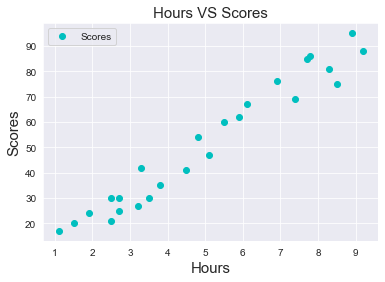

In [295]:
sns.set_style("darkgrid")
df.plot(x="Hours",y="Scores",style="oc")
plt.title("Hours VS Scores",fontsize=15)
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)

From the graph, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

Text(0, 0.5, 'Scores')

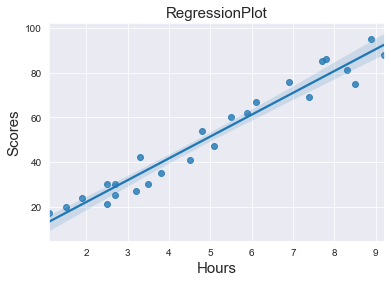

In [296]:
sns.regplot(x=df["Hours"],y=df["Scores"])
plt.title("RegressionPlot",fontsize=15)
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)

From the graph, we can clearly see that there is a positive linear relation between the number of hours studied and mark scores.

Box Plot

<AxesSubplot:>

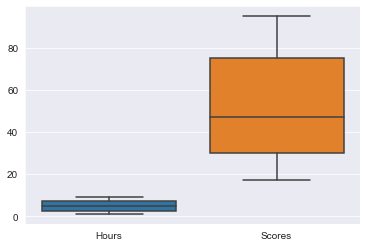

In [297]:
#checking for outliers
sns.boxplot(data=df[["Hours","Scores"]])

From the above plot, we can clearly see that there is no outliers in the data.

Splitting the dataset

In [298]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [299]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [300]:
x_train.shape,x_test.shape

((20, 1), (5, 1))

Training the model

In [301]:
lr=LinearRegression()
lr.fit(x_train,y_train)
print("Training Complete")

Training Complete


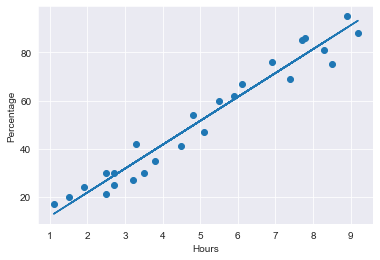

In [302]:
line = lr.coef_ * x + lr.intercept_
plt.scatter(df['Hours'],df['Scores'])
plt.plot(x,line)
plt.xlabel('Hours')
plt.ylabel('Percentage');

Making Prediction

In [303]:
y_pred=lr.predict(x_test).round()
y_pred

array([17., 34., 75., 27., 60.])

Comparing Actual Score VS Predicted Score

In [304]:
pred=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
pred

,Actual,Predicted
0,20,17.0
1,27,34.0
2,69,75.0
3,30,27.0
4,62,60.0


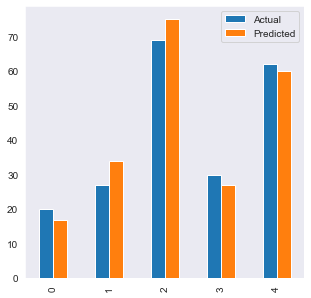

In [305]:
# Plotting the Bar graph to depict the difference between the actual and predicted value
pred.plot(kind='bar',figsize=(5,5))
plt.grid(which='major', linewidth='0.5', color='red')
plt.grid(which='minor', linewidth='0.5', color='blue')
plt.show()

In [306]:
#Estimating training and test score
print("Training Score:",lr.score(x_train,y_train))
print("Test Score:",lr.score(x_test,y_test))

Training Score: 0.9515510725211552
Test Score: 0.9454906892105354


What will be predicted score if a student studies for 9.25 hrs/ day?

In [307]:
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = lr.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


According to the regression model if a student studies 9.25 hours a day, he/she is likely to score 93.69 marks

Evaluating The Model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. Here different errors have been calculated to compare the model performance and predict the accuracy

In [308]:
from sklearn import metrics 
print('R-2:', metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-2: 0.9459923278820916
Mean Absolute Error: 4.2
Mean Squared Error: 21.4
Root Mean Squared Error: 4.626013402488151


Conclusion:
I was successfully able to carry-out Prediction using Supervised ML task and was able to evaluate the model's performance on various parameters.